In [210]:
import pandas as pd

ach_log_file = r"C:\Yahia\Home\Yahia-Dev\Python\training\xml\performance\SystemLog\SystemLog\Log10172021.txt"
timex = []
files = []
actions=[]
status = []
line_no = 1
with open(ach_log_file, 'rt') as f:
    while(True):
        line = f.readline()
        if not line:
            break
        
        try:
            x = line.split('::::')
            fdt_time = x[0] 
            action = x[1].split()[0]
        except:
            # print (line_no, 'error parsing action:', line)
            action = '***'
            fdt_time = ''

        ls = line.split('"')
        if len(ls) > 1:
            file_name = ls[1]
            ls = ls[2].split()
            download_status = ls[0] if len(ls) > 0 else ''
        else:
            file_name = ''
            download_status = ''
        # print(line_no, '- ', fdt_time, '----',action, '***', file_name)
        timex.append(fdt_time)
        files.append(file_name)
        actions.append(action)
        status.append(download_status)
        line_no += 1
        # timex.append(x)
        # time_str.append(ftime)
       

In [211]:
data1={ 'Time':timex,
        'File': files,
        'Action':actions,
        'Status': status
}
data = pd.DataFrame(data1)
data['Time'] = pd.to_datetime(data['Time'])

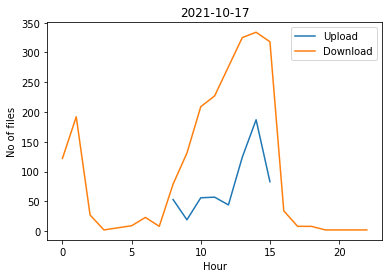

In [213]:
import matplotlib.pyplot as plt
d = data.loc [data['Action'] == 'Downloading']
d= d[d['Status'] == 'Completed']
d['Hour']= d['Time'].dt.hour 
x = d.groupby(['Hour']).count()['File']
d = pd.DataFrame(x)
d = d.rename(columns={'File':'Download'})

u = data.loc [data['Action'] == 'Uploading']
u= u[u['Status'] == 'Completed']
u['Hour']= u['Time'].dt.hour 
x = u.groupby(['Hour']).count()['File']
u = pd.DataFrame(x)
u=u.rename(columns={'File':'Upload'})
all = d.join(u, on='Hour')

all.plot( y=['Upload', 'Download'])
plt.ylabel('No of files')
data_date = data['Time'].dt.date.unique()[0]
plt.title (data_date)
plt.show()



In [216]:
import os
ach_log_dir = r"C:\Yahia\Home\Yahia-Dev\Python\training\xml\performance\SystemLog\SystemLog"
for f in os.listdir(ach_log_dir):
    with open(os.path.join(ach_log_dir,f), 'rt') as f:
        while(True):
            line = f.readline()
            if not line:
                break
            
            try:
                x = line.split('::::')
                fdt_time = x[0] 
                action = x[1].split()[0]
            except:
                # print (line_no, 'error parsing action:', line)
                action = '***'
                fdt_time = ''

            ls = line.split('"')
            if len(ls) > 1:
                file_name = ls[1]
                ls = ls[2].split()
                download_status = ls[0] if len(ls) > 0 else ''
            else:
                file_name = ''
                download_status = ''
            # print(line_no, '- ', fdt_time, '----',action, '***', file_name)
            timex.append(fdt_time)
            files.append(file_name)
            actions.append(action)
            status.append(download_status)
            line_no += 1

In [217]:
data1={ 'Time':timex,
        'File': files,
        'Action':actions,
        'Status': status
}
data = pd.DataFrame(data1)
data['Time'] = pd.to_datetime(data['Time'])

In [ ]:
data.to_csv(r'.\data\ach_log_data_all.csv')

In [2]:
import pandas as pd
data = pd.read_csv(r'.\data\ach_log_data_all.csv', parse_dates=['Time'])

Summaries data for download/upload

In [3]:
d = data.loc [data['Action'] == 'Downloading']
d= d[d['Status'] == 'Completed']
d['Date']= d['Time'].dt.date 
x = d.groupby(['Date']).count()['File']
d = pd.DataFrame(x)
d = d.rename(columns={'File':'Download'})

u = data.loc [data['Action'] == 'Uploading']
u= u[u['Status'] == 'Completed']
u['Date']= u['Time'].dt.date 
x = u.groupby(['Date']).count()['File']
u = pd.DataFrame(x)
u=u.rename(columns={'File':'Upload'})
upld_dnld_data = d.join(u, on='Date')


In [109]:
upld_dnld_data.head()

,Download,Upload
Date,,
2019-10-22,255,4.0
2019-10-23,356,3.0
2019-10-24,394,5.0
2019-10-25,2,NaN
2019-10-27,465,4.0


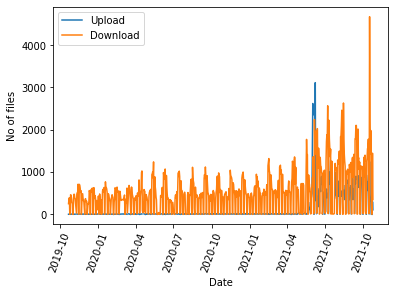

In [5]:
import matplotlib.pyplot as plt

upld_dnld_data.plot( y=['Upload', 'Download'])
plt.ylabel('No of files')
# data_date = data['Time'].dt.date.unique()[0]  
plt.xticks(rotation = 70)
# plt.title (data_date)
plt.show()

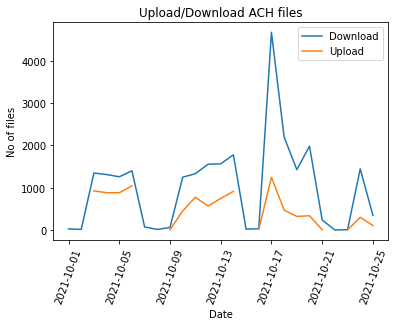

In [6]:
import datetime 
import numpy as np

# upld_dnld_data.loc[np.datetime64('2021-06-01'): np.datetime64('2021-10-31')].plot()
upld_dnld_data.loc[np.datetime64('2021-10-01'): np.datetime64('2021-10-31')].plot()

plt.ylabel('No of files')
plt.xticks(rotation = 70)
plt.title ('Upload/Download ACH files')
plt.show()


In [11]:
data.head()

,Unnamed: 0,Time,File,Action,Status
0,0,2021-10-17 00:00:06,NaN,Open,NaN
1,1,2021-10-17 00:18:49,29_PACS008_20211017001841390062.xml,Downloading,......
2,2,2021-10-17 00:18:49,29_PACS008_20211017001841390062.xml,Downloading,Completed
3,3,2021-10-17 00:18:50,29_PACS002_20211017001841421057_S.xml,Downloading,......
4,4,2021-10-17 00:18:50,29_PACS002_20211017001841421057_S.xml,Downloading,Completed


In [51]:
data[['Time']].loc[data['Status'] == 'Completed']

,Time
2,2021-10-17 00:18:49
4,2021-10-17 00:18:50
6,2021-10-17 00:18:59
8,2021-10-17 00:18:59
10,2021-10-17 00:18:59
...,...
3724159,2020-12-31 20:32:19
3724161,2020-12-31 20:32:21
3724163,2020-12-31 20:32:21
3724165,2020-12-31 20:32:22


In [68]:
start = data[['Time','File']].loc[data['Status'] == '......']
end = data[['Time','File']].loc[data['Status'] == 'Completed']
end.columns =['End', 'File']
# start
end
# dnld_time = start.join(end, on=['File'] )
dnld_time = pd.concat(start, end )
# dnld_time.head()

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"